In [9]:
## from https://arxiv.org/pdf/1902.07810.pdf

In [5]:
# Run segmentation for full image 

# Watch for the inference time, it is long for smaller images
import torch
import numpy as np
import FCN_NetModel as NET_FCN# The net Class
from PIL import Image
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
import matplotlib.pyplot as plt
def segment_image(input_image, output_file):
    Trained_model_path="../../Downloads/PointerSegmentationNetWeights.torch"# Path of trained model
    #Create and Initiate net and create optimizer
    print("Loading model")
    Net=NET_FCN.Net() # Create net and load pretrained encoder path
    Net.AddAttentionLayer() # Load attention layer
    #Net=Net.cuda()
    Net.load_state_dict(torch.load(Trained_model_path, map_location = 'cpu')) # load trained model
    Net.eval()
    print("Model Loaded")
    # Read image and generate initial ROI mask
    Im=Image.open(input_image)
    plt.figure(figsize = (10,10))
    plt.imshow(Im)
    plt.show()
    I=np.array(Im)[:,:,0:3]
    H,W,d=I.shape
    I=np.expand_dims(I,0)
    ROIMask=np.ones(I.shape[:3]) # Generate ROI mask that cover the full image
    # Start segmentation with up to 100 pixel pointers
    for ii in range(100):

    # pick random point in ROI mask
            print("picking next point")
            while (True):
                X = np.random.randint(W)
                Y = np.random.randint(H)
                if ROIMask[0,Y,X]==1: break
    # Generate Pointer mask
            PointerMask=np.zeros(ROIMask.shape)
            PointerMask[0, Y, X] = 1

    # run inference predict segment
            Prob, PredLb = Net.forward(Images=I, Pointer=PointerMask,ROI=ROIMask)  # Run net inference and get prediction
            PredLb=PredLb.data.cpu().numpy()
            ROIMask[PredLb == 1] = 0 # Remove predicted segment from the ROI mask

    # Stiched the predicted segment to full segmentation mask
            if ii==0:
                seg_viz=np.zeros(I[0].shape,dtype=np.uint8)
            seg_viz[:,:, 0] += np.uint8(PredLb[0]*(ii+1)*21%255)
            seg_viz[:,:, 1] += np.uint8(PredLb[0]*((ii+1)*67) % 255)
            seg_viz[:,:, 2] += np.uint8(PredLb[0]*((ii+1) * 111) % 255)
    # break when 95% of the image have been segmented
            if (ROIMask.sum() / W / H) < 0.05: break
            print(str(ii)+") ROI as fraction of image "+str(ROIMask.sum() / W / H))
    #=============================Display and save reslut====================================================================================
    OverLay=(I[0]*0.2+seg_viz*0.8).astype(np.uint8)
    disp1 = Image.fromarray(OverLay, 'RGB')
    plt.figure(figsize = (10,10))
    plt.imshow(disp1)
    plt.show()
    #disp1.show()
    disp1.save(output_file)




Loading model
Model Loaded


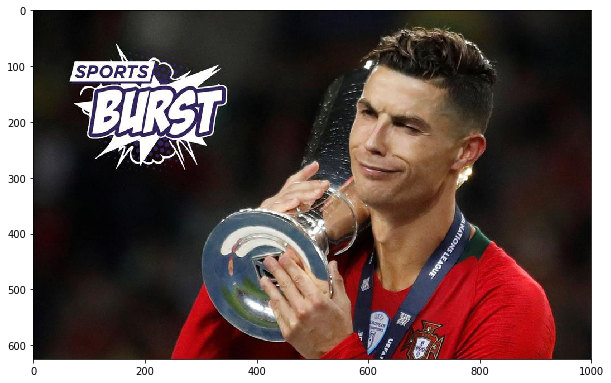

picking next point


/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0) ROI as fraction of image 0.3798256
picking next point
1) ROI as fraction of image 0.1931456
picking next point
2) ROI as fraction of image 0.1873728
picking next point
3) ROI as fraction of image 0.1753168
picking next point
4) ROI as fraction of image 0.11002719999999999
picking next point
5) ROI as fraction of image 0.066008
picking next point
6) ROI as fraction of image 0.061979200000000005
picking next point


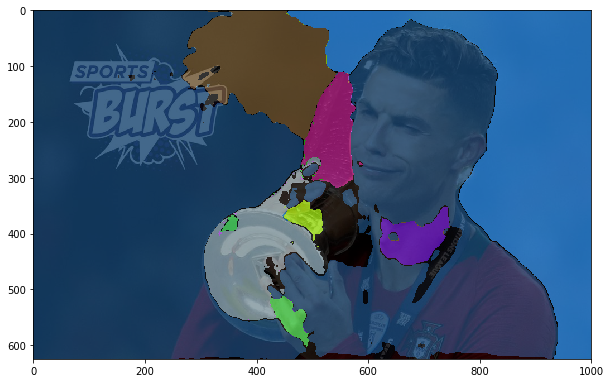

In [8]:
segment_image("./test_images/cr7.jpg", './test_outputs/cr7_label.png')

Loading model
Model Loaded


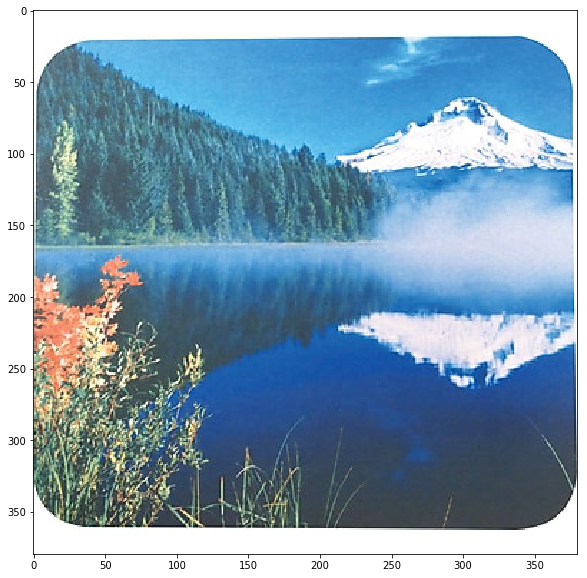

picking next point


/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0) ROI as fraction of image 0.26507617728531857
picking next point
1) ROI as fraction of image 0.17268698060941828
picking next point
2) ROI as fraction of image 0.13745152354570636
picking next point
3) ROI as fraction of image 0.09788781163434902
picking next point
4) ROI as fraction of image 0.09288781163434903
picking next point
5) ROI as fraction of image 0.09245844875346261
picking next point
6) ROI as fraction of image 0.07905817174515235
picking next point


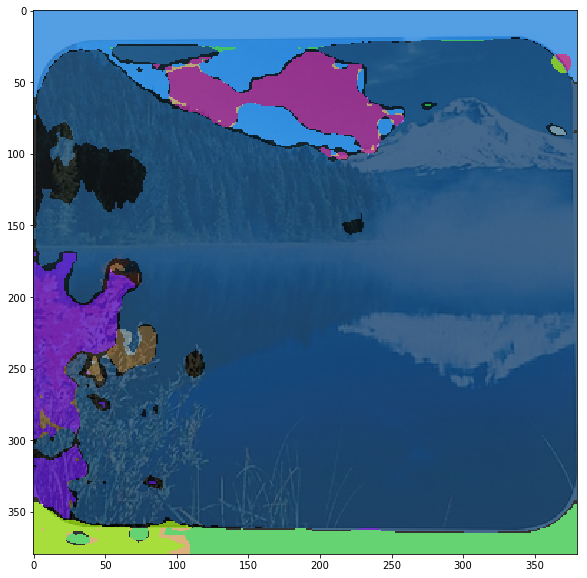

In [7]:
segment_image("./test_images/mountain.jpeg", './test_outputs/mountain_label.png')

Loading model
Model Loaded


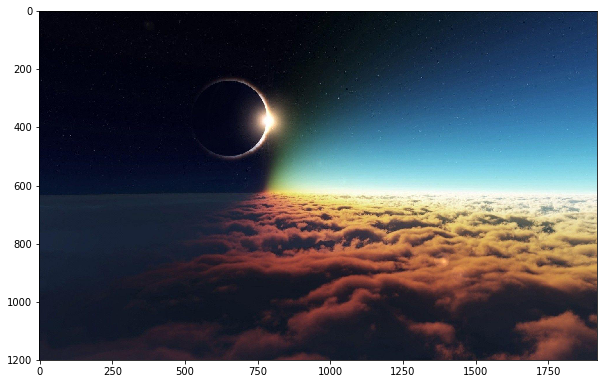

picking next point


/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0) ROI as fraction of image 0.06103689236111111
picking next point
1) ROI as fraction of image 0.06055121527777777
picking next point


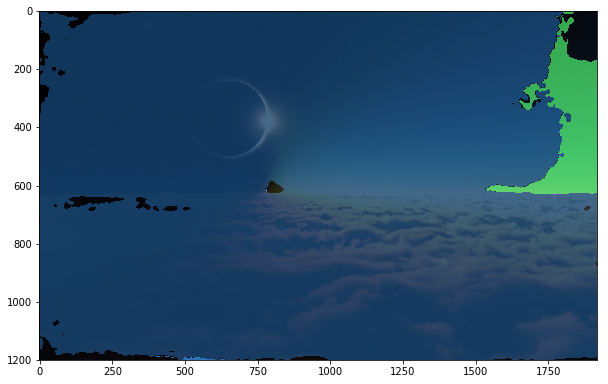

In [10]:
segment_image('./test_images/eclipse.jpg','./test_outputs/eclipse_label.jpg')

Loading model
Model Loaded


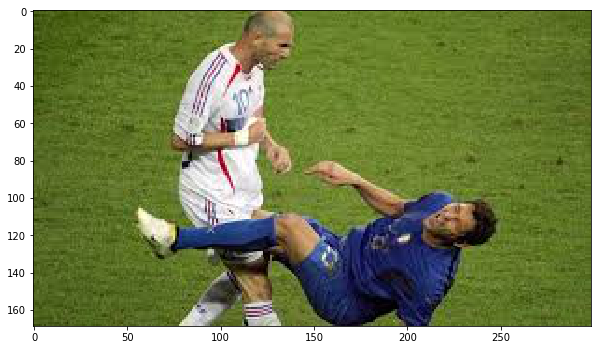

picking next point


/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0) ROI as fraction of image 0.40157527062595244
picking next point
1) ROI as fraction of image 0.31887356276345213
picking next point
2) ROI as fraction of image 0.14646454651600008
picking next point
3) ROI as fraction of image 0.09659416991549741
picking next point
4) ROI as fraction of image 0.09621816310779521
picking next point
5) ROI as fraction of image 0.08222675189487641
picking next point
6) ROI as fraction of image 0.05537194989214542
picking next point


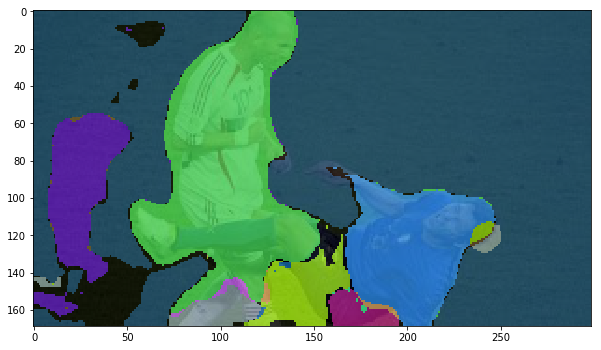

In [11]:
segment_image('../../Downloads/wc2006.jpeg','./test_outputs/wc2006_label.jpg')